# SVM
Support Vector Machines are classification techniques that separate the Data by Maximising the (soft) margin between the classes

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../datasets/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)

In [5]:
df.drop('ID', axis=1, inplace=True)

In [6]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Cleaning the data
The data is cleaned by removing the missing values and the categorical variables are converted to numerical variables using one hot encoding
For the missing data we can either:
- Remove the rows with missing data
- Impute the values that are missing

In [7]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

There is no NA beacuse all the values are float or int

Make sure that SEX only contains the number 1 and 2

In [8]:
df['SEX'].unique()

array([2, 1])

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

I assume that 0 contains missing data. 
Let's see how manu rows contain missing data

In [11]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [12]:
len(df)

30000

We can safely remove rows with missing data

In [13]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
df_no_missing

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [14]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [15]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

We are downsample the datasets 

In [16]:
from sklearn.utils import resample
df_no_default_dwn = resample(df_no_default, replace=False, n_samples=1000)
df_default_dwn = resample(df_default, replace=False, n_samples=1000)

In [17]:
df_dwn = pd.concat([df_default_dwn, df_no_default_dwn])

In [18]:
df_dwn

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
4015,100000.0,1,2,2,33,5,4,3,2,2,...,87150.0,85636.0,91007.0,0.0,0.0,3200.0,0.0,6803.0,6950.0,1
25160,80000.0,2,1,2,29,2,2,2,2,2,...,42236.0,44924.0,44072.0,0.0,3800.0,0.0,3400.0,0.0,3816.0,1
29413,100000.0,1,2,2,30,2,4,4,4,3,...,93580.0,91181.0,93563.0,4900.0,5900.0,0.0,0.0,4000.0,3200.0,1
20943,280000.0,1,2,1,39,2,0,0,0,0,...,139280.0,139188.0,271388.0,5000.0,5000.0,6585.0,6409.0,6046.0,3053.0,1
6051,30000.0,1,2,1,58,-1,-1,-1,-1,-1,...,4151.0,3940.0,3697.0,4777.0,3770.0,4151.0,3940.0,3697.0,843.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15292,200000.0,2,2,1,45,-2,-2,-2,-2,-2,...,3532.0,0.0,0.0,0.0,198.0,3532.0,0.0,0.0,0.0,0
5287,200000.0,2,2,3,57,0,0,0,0,0,...,86216.0,88071.0,90842.0,3500.0,3000.0,7000.0,3400.0,4400.0,6500.0,0
23728,220000.0,2,1,1,51,-2,-2,-2,-2,-2,...,1917.0,809.0,709.0,2625.0,4863.0,1917.0,809.0,709.0,1195.0,0
12293,230000.0,2,2,2,35,-1,-1,0,0,0,...,58171.0,56033.0,47192.0,29525.0,50014.0,8242.0,7032.0,5030.0,8007.0,0


## Split the data
We split the data in the columns X (features), y the label.

In [19]:
X = df_dwn.drop('DEFAULT', axis=1).copy()
y = df_dwn['DEFAULT'].copy()

In [20]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4015,100000.0,1,2,2,33,5,4,3,2,2,...,86256.0,87150.0,85636.0,91007.0,0.0,0.0,3200.0,0.0,6803.0,6950.0
25160,80000.0,2,1,2,29,2,2,2,2,2,...,43231.0,42236.0,44924.0,44072.0,0.0,3800.0,0.0,3400.0,0.0,3816.0
29413,100000.0,1,2,2,30,2,4,4,4,3,...,95979.0,93580.0,91181.0,93563.0,4900.0,5900.0,0.0,0.0,4000.0,3200.0
20943,280000.0,1,2,1,39,2,0,0,0,0,...,134910.0,139280.0,139188.0,271388.0,5000.0,5000.0,6585.0,6409.0,6046.0,3053.0
6051,30000.0,1,2,1,58,-1,-1,-1,-1,-1,...,3767.0,4151.0,3940.0,3697.0,4777.0,3770.0,4151.0,3940.0,3697.0,843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15292,200000.0,2,2,1,45,-2,-2,-2,-2,-2,...,198.0,3532.0,0.0,0.0,0.0,198.0,3532.0,0.0,0.0,0.0
5287,200000.0,2,2,3,57,0,0,0,0,0,...,80592.0,86216.0,88071.0,90842.0,3500.0,3000.0,7000.0,3400.0,4400.0,6500.0
23728,220000.0,2,1,1,51,-2,-2,-2,-2,-2,...,4863.0,1917.0,809.0,709.0,2625.0,4863.0,1917.0,809.0,709.0,1195.0
12293,230000.0,2,2,2,35,-1,-1,0,0,0,...,65868.0,58171.0,56033.0,47192.0,29525.0,50014.0,8242.0,7032.0,5030.0,8007.0


In [21]:
y

4015     1
25160    1
29413    1
20943    1
6051     1
        ..
15292    0
5287     0
23728    0
12293    0
27504    0
Name: DEFAULT, Length: 2000, dtype: int64

## One hot encoding
Now we need to one hot encode the categorical data.
- SEX: 1/2
- EDUCATION: 1-6 
- MARRIAGE: 1-2-3
- PAY: 1-2-3-4-5-6 --> from -2 to 8

In [22]:
sorted(df_dwn['PAY_2'].unique())

[-2, -1, 0, 1, 2, 3, 4, 5, 7]

In [23]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
4015,100000.0,1,2,33,5,4,3,2,2,2,...,91007.0,0.0,0.0,3200.0,0.0,6803.0,6950.0,False,True,False
25160,80000.0,2,1,29,2,2,2,2,2,2,...,44072.0,0.0,3800.0,0.0,3400.0,0.0,3816.0,False,True,False
29413,100000.0,1,2,30,2,4,4,4,3,2,...,93563.0,4900.0,5900.0,0.0,0.0,4000.0,3200.0,False,True,False
20943,280000.0,1,2,39,2,0,0,0,0,0,...,271388.0,5000.0,5000.0,6585.0,6409.0,6046.0,3053.0,True,False,False
6051,30000.0,1,2,58,-1,-1,-1,-1,-1,-1,...,3697.0,4777.0,3770.0,4151.0,3940.0,3697.0,843.0,True,False,False


In [24]:
X_encoded = pd.get_dummies(X, columns=['MARRIAGE',
                                       "SEX",
                                       'EDUCATION',
                                       "PAY_0",
                                       "PAY_2",
                                       "PAY_3", "PAY_4", "PAY_5", "PAY_6"])

In [25]:
X_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_7',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_6', 'PAY_3_7', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5'

## Centering and scaling data
Now we need to center and scale the data to feed it easily in the RBF kernel

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


In [27]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

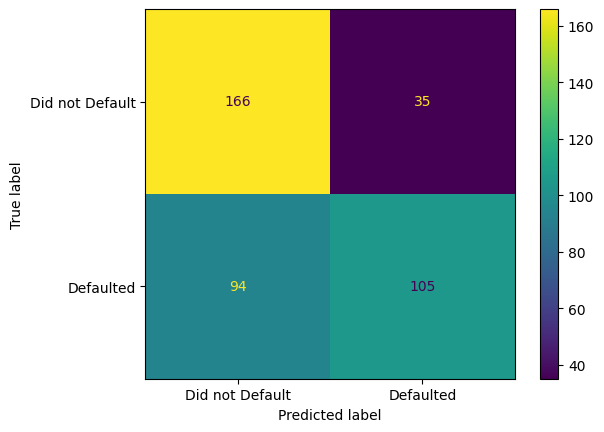

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf_svm.predict(X_test_scaled)

conf = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test,
                                                  display_labels=["Did not Default", "Defaulted"])

To optimize we use cross validation

In [29]:
from sklearn.model_selection import GridSearchCV
param = [
    {"C": [0.5, 1, 10, 100],  # Regularization
     "gamma": ["scale", 1, 0.1, 0.001],
     "kernel": ["rbf"]},
]

optimal_params = GridSearchCV(
    SVC(),
    param,
    cv=5,
    scoring="accuracy",
    verbose=2
)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1

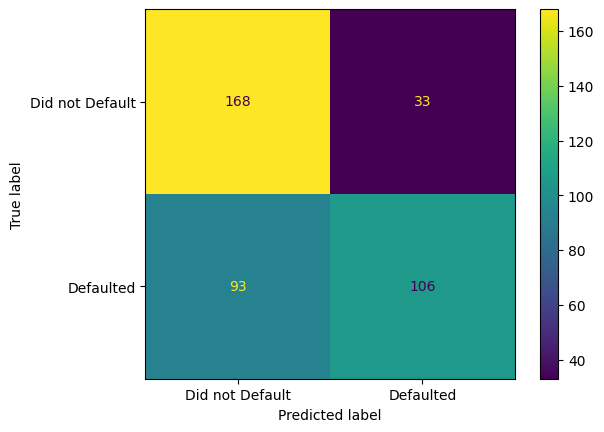

In [30]:
clf_svm = SVC(C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)
conf_disp = ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test,
                                                  display_labels=["Did not Default", "Defaulted"])

## PCA
We want to shrink the components to 2 to plot the data

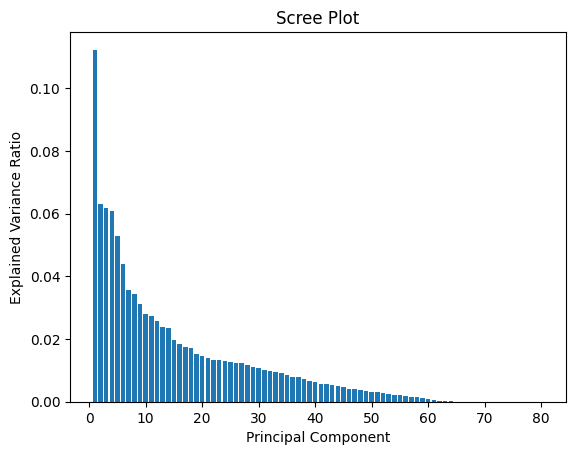

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
x_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the bar plot
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [32]:
train_pc1_coords = x_train_pca[:, 0]
train_pc2_coords = x_train_pca[:, 1]

pca_train_scaled = scale(np.stack((train_pc1_coords, train_pc2_coords), axis=1))
optimal_params = GridSearchCV(SVC(), param, cv=5, scoring="accuracy", verbose=2)
optimal_params.fit(pca_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [33]:
optimal_params.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

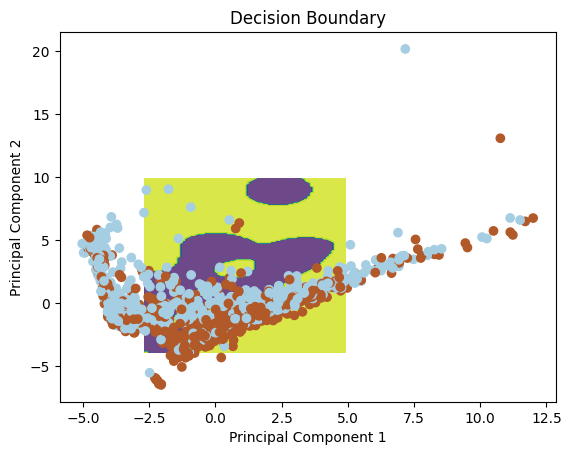

In [34]:
clf_svm = SVC(C=100, gamma="scale")
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

# Create a meshgrid of points covering the feature space
x_min, x_max = pca_train_scaled[:, 0].min() - 1, pca_train_scaled[:, 0].max() + 1
y_min, y_max = pca_train_scaled[:, 1].min() - 1, pca_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the meshgrid and decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(train_pc1_coords, train_pc2_coords, c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary')
plt.show()


In [41]:
cls = df_dwn.columns
df_dwn_short = df_dwn[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']]
df_dwn_short

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,DEFAULT
4015,100000.0,2,2,33,1
25160,80000.0,1,2,29,1
29413,100000.0,2,2,30,1
20943,280000.0,2,1,39,1
6051,30000.0,2,1,58,1
...,...,...,...,...,...
15292,200000.0,2,1,45,0
5287,200000.0,2,3,57,0
23728,220000.0,1,1,51,0
12293,230000.0,2,2,35,0


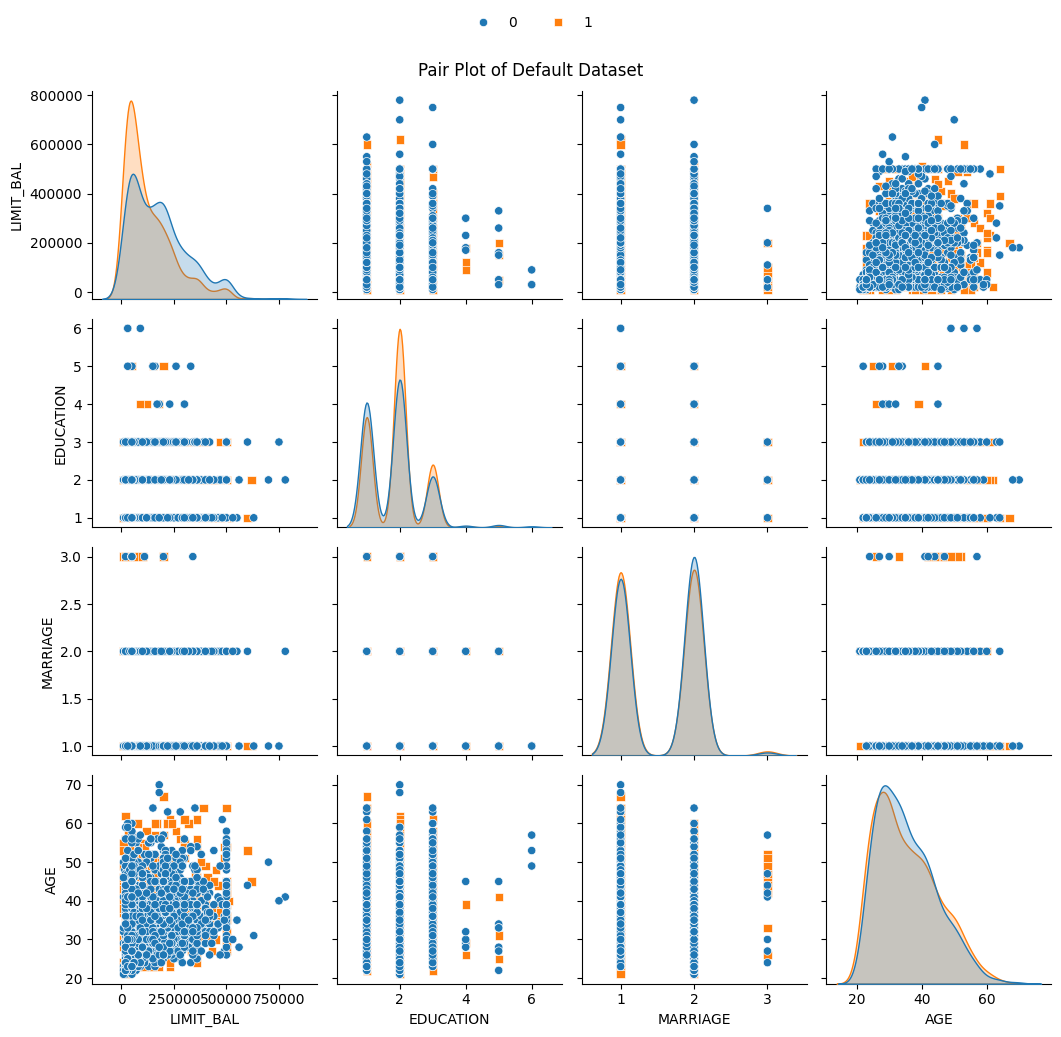

In [39]:
# Reduce dimensions with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns

ax = sns.pairplot(df_dwn_short, hue='DEFAULT', markers=["o", "s"])
plt.suptitle("Pair Plot of Default Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

Standardize the features

In [52]:
from sklearn.preprocessing import scale
df_scaled = df.copy()
df_scaled[df_scaled.columns] = scale(df_scaled[df_scaled.columns])


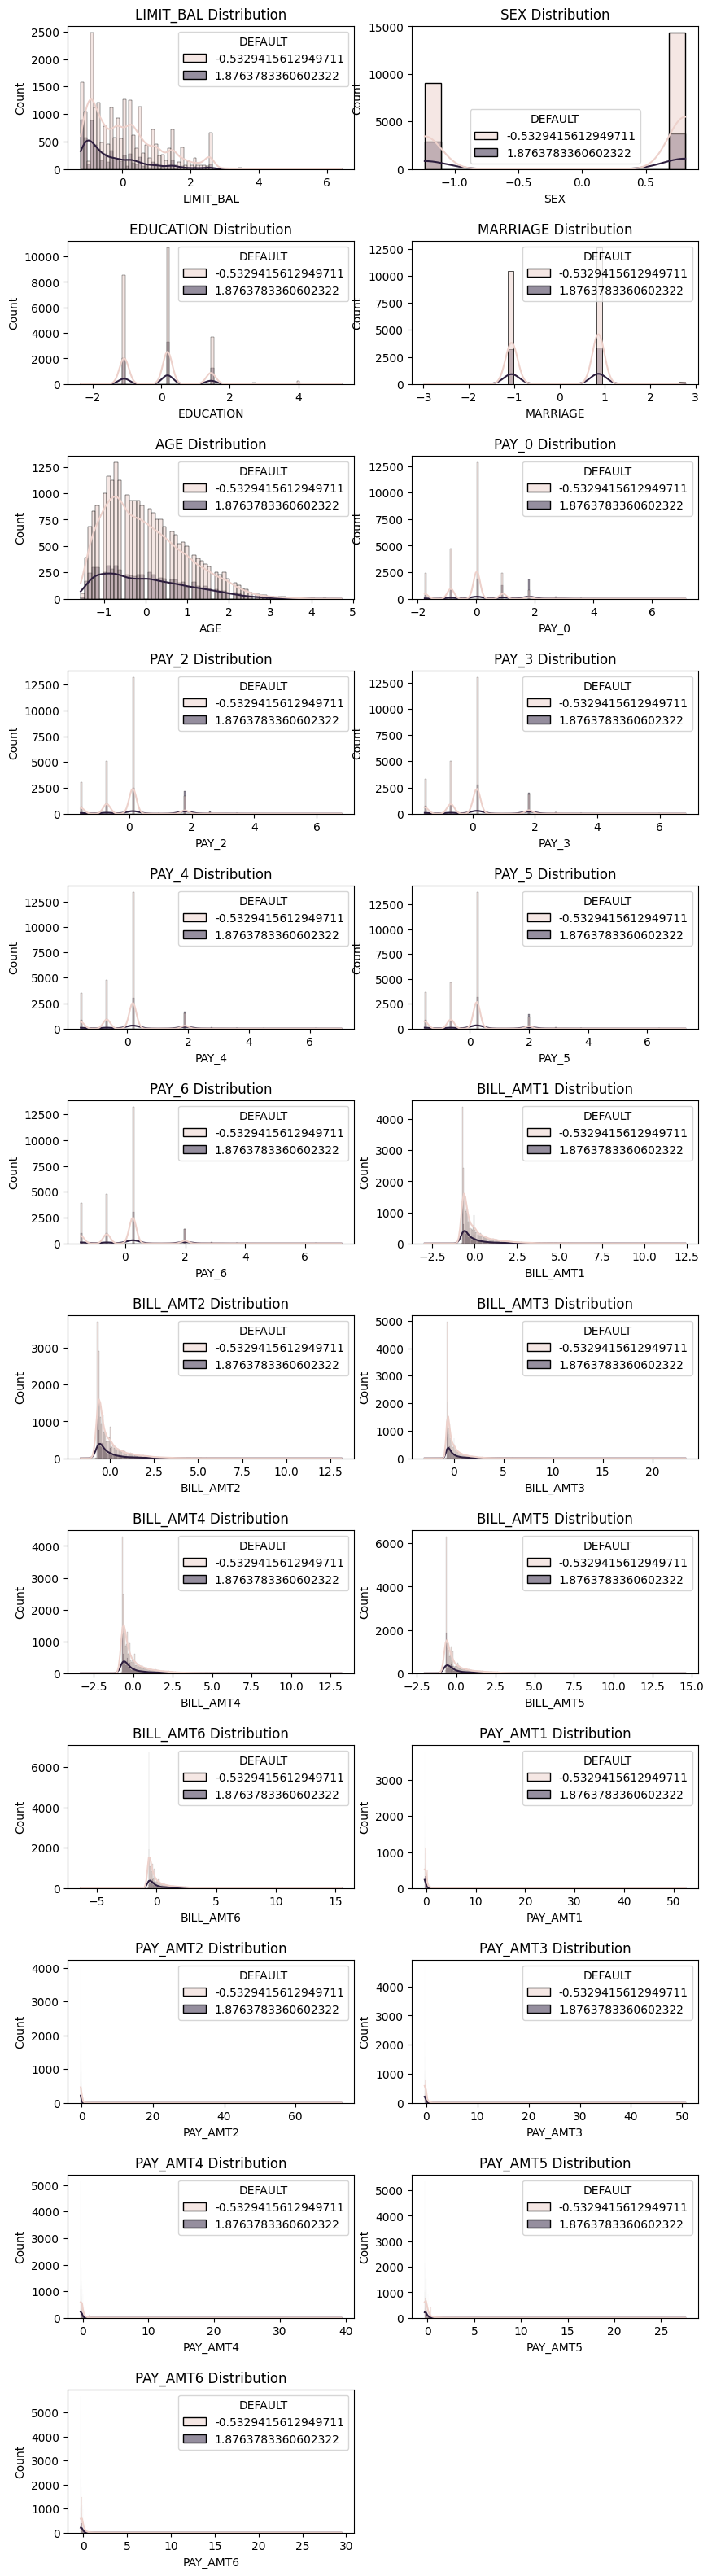

In [53]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(10, 40))
plt.subplots_adjust(hspace=0.5)  # Adjust the hspace parameter to increase the space between the subplots
for i, feature in enumerate(cls[:-1]):
    plt.subplot(len(cls)//2, 2, i + 1)
    sns.histplot(data=df_scaled, x=feature, hue='DEFAULT', kde=True)
    plt.title(f'{feature} Distribution')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [56]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [58]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

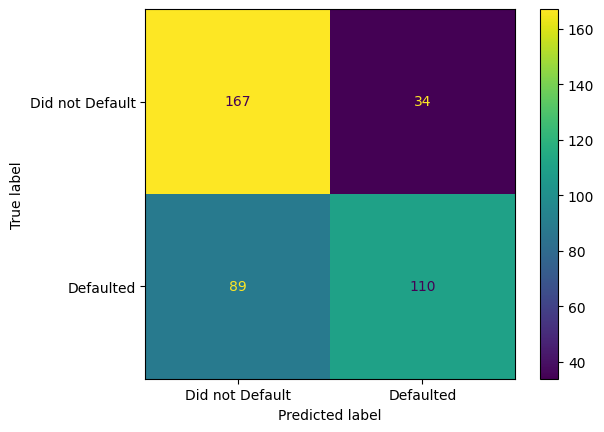

In [59]:
conf_disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                                                  display_labels=["Did not Default", "Defaulted"])